In [1]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)


PATH=%env PATH
HOME=%env HOME

%env PATH=$HOME/cuda_10.1/bin:$PATH
%env LD_LIBRARY_PATH=$HOME/cuda_10.1/lib64

/userhome/cs/u3566269/anaconda3/envs/mmseg/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.12.0+cu113 True
0.30.0
env: PATH=/userhome/cs/u3566269/cuda_10.1/bin:/userhome/cs/u3566269/.local/bin:/userhome/cs/u3566269/anaconda3/envs/mmseg/bin:/userhome/cs/u3566269/anaconda3/condabin:/usr/local/slurm/bin:/usr/local/slurm/sbin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin
env: LD_LIBRARY_PATH=/userhome/cs/u3566269/cuda_10.1/lib64


In [2]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette


In [4]:
config_file = "configs/deeplabv3plus/deeplabv3plus_custom.py"
checkpoint_file = "work_dirs/openearth/deeplabv3/apr_12_40k/latest.pth"

In [5]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda')

/userhome/cs/u3566269/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: work_dirs/openearth/deeplabv3/apr_12_40k/latest.pth


In [6]:
categories = {
    'unknown': {
        'index': 0, 
        'color': [0,0,0]
    },
    'bareland': {
        'index': 1, 
        'color': [128,0,0]
    },
    'grass': {
        'index': 2, 
        'color': [0,255,36]
    },
    'pavement': {
        'index': 5, 
        'color': [148,148,148]
    },
    'road': {
        'index': 3, 
        'color': [255,255,255]
    },
    'tree': {
        'index': 6, 
        'color': [34,97,38]
    },
    'water': {
        'index': 4, 
        'color': [0,69,255]
    },
    'cropland': {
        'index': 8, 
        'color': [75, 181, 73]
    },
    'buildings': {
        'index': 7, 
        'color': [222, 31, 7]
    }
}

classes = [None] * len(categories)

for key in categories: 
    classes[categories[key]['index']] = key

palette = [categories[key]['color'] for key in classes]
print(classes)
print(palette)

['unknown', 'bareland', 'grass', 'road', 'water', 'pavement', 'tree', 'buildings', 'cropland']
[[0, 0, 0], [128, 0, 0], [0, 255, 36], [255, 255, 255], [0, 69, 255], [148, 148, 148], [34, 97, 38], [222, 31, 7], [75, 181, 73]]


al_qurnah_38
(1024, 1024)


(-0.5, 1023.5, 1023.5, -0.5)

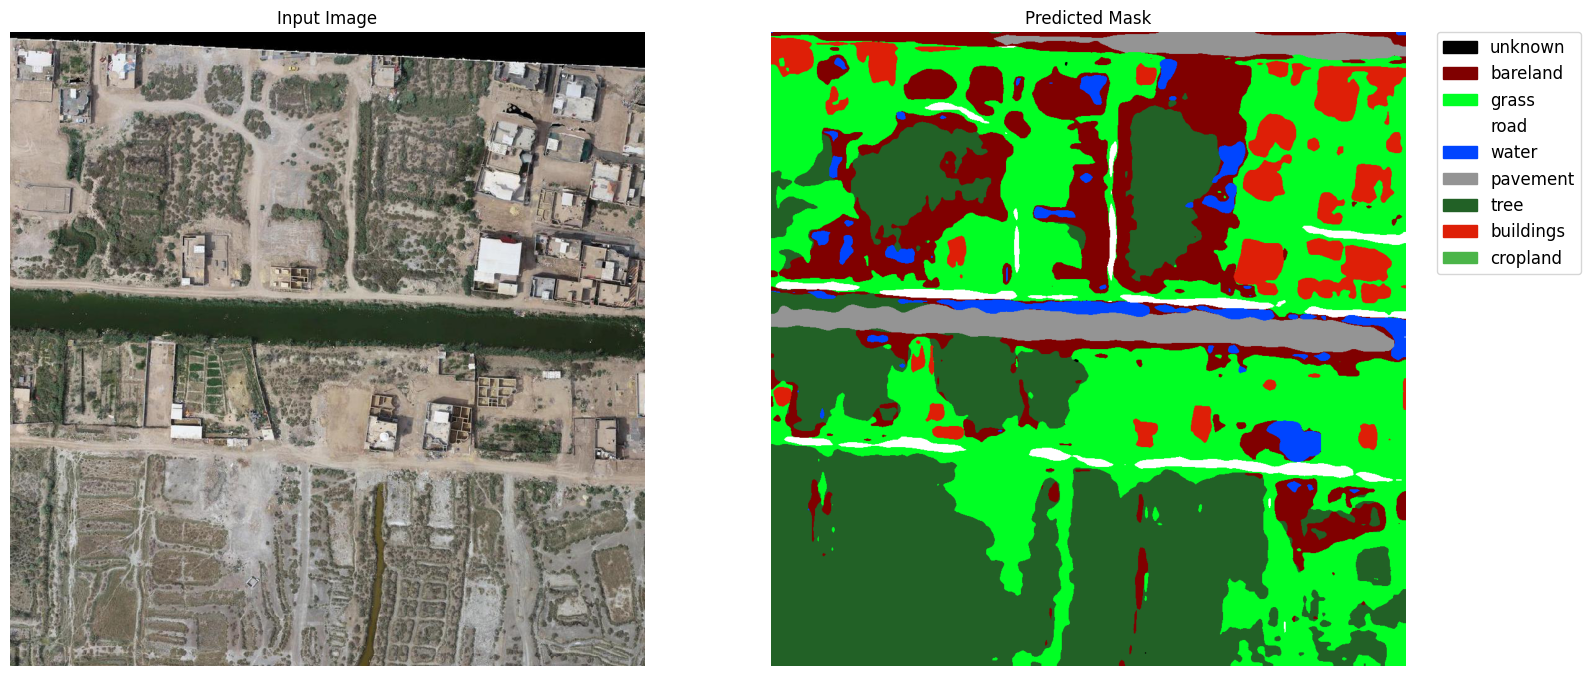

In [14]:
import sys
import numpy as np
from PIL import Image
import os 
import random 

np.set_printoptions(threshold=sys.maxsize)

image_list = os.listdir("openearth/images")
key = image_list[random.randint(0, len(image_list)-1)][:-4]

print(key)

img = f'openearth/images/{key}.jpg'
result = inference_segmentor(model, img)[0]
print(result.shape)

# Load the true mask
seg_img = Image.fromarray(result.astype(np.uint8)).convert('P')
seg_img.putpalette(np.array(palette, dtype=np.uint8))



# Let's take a look at the segmentation map we got
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, axs = plt.subplots(1,2, figsize=(18,12))

axs[0].imshow(Image.open(img))


im = axs[1].imshow(np.array(seg_img.convert('RGB')))
axs[1].set_title("Predicted Mask")


# create a patch (proxy artist) for every color 
model_patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(9)]

# im = plt.imshow(mask)

# # create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(9)]
# put those patched as legend-handles into the legend
axs[1].legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')

# axs[2].imshow(mask)
# axs[2].set_title("True Mask")
axs[0].set_title("Input Image")


axs[0].axis('off')

axs[1].axis('off')



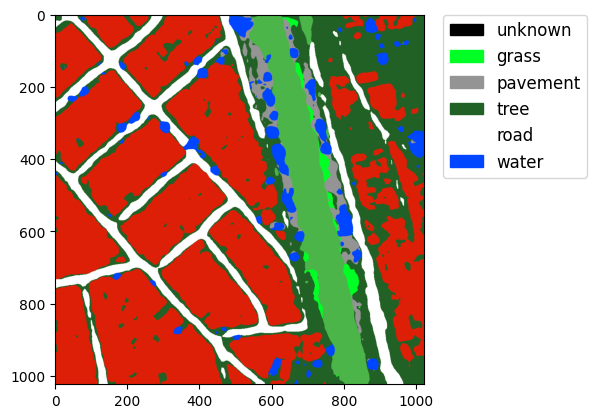

In [42]:
# Let's take a look at the segmentation map we got
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


im = plt.imshow(np.array(seg_img.convert('RGB')))


# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(6)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.imshow(seg_img.convert('RGB'))

plt.show()

In [ ]:

im = plt.imshow(mask)

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(6)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.imshow(mask)

plt.show()

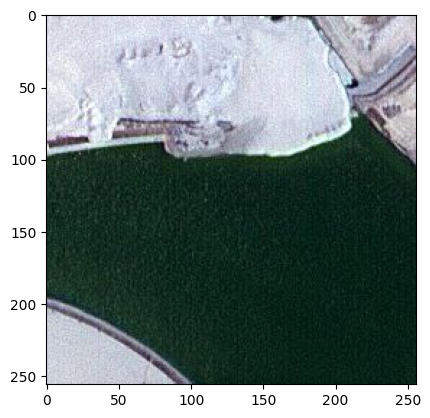

In [14]:
plt.imshow(Image.open(img))